In [1]:
import numpy as np
np.random.seed(800)
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
os.environ['KERAS_BACKEND'] = 'tensorflow'
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [2]:
import sys
print(sys.version)

3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:47:18) [MSC v.1916 64 bit (AMD64)]


In [3]:
images_directory = '../data/chest_xray/'
SIZE = 180
dataset = []
label = []

In [4]:
infected_images = os.listdir(images_directory + 'train/PNEUMONIA/')
for i, image_name in enumerate(infected_images):
     if (image_name.split('.')[1] == 'jpeg'):
        image = cv2.imread(images_directory + 'train/PNEUMONIA/' + image_name,  cv2.IMREAD_GRAYSCALE)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [5]:
normal_images = os.listdir(images_directory + 'train/NORMAL/')
for i, image_name in enumerate(normal_images):
     if (image_name.split('.')[1] == 'jpeg'):
        image = cv2.imread(images_directory + 'train/NORMAL/' + image_name, cv2.IMREAD_GRAYSCALE)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

Text(0.5, 1.0, 'Pnuemonia')

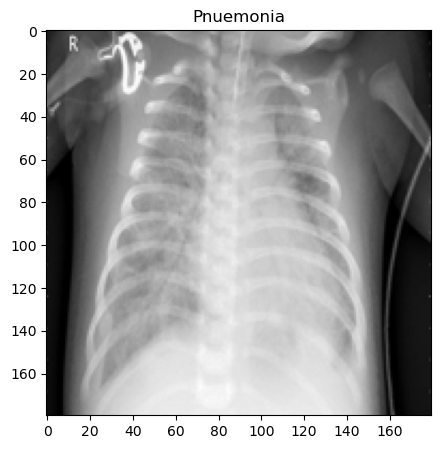

In [6]:
plt.figure(figsize = (5,5))
plt.imshow(dataset[0], cmap='gray')
plt.title('Pnuemonia')

Text(0.5, 1.0, 'Normal')

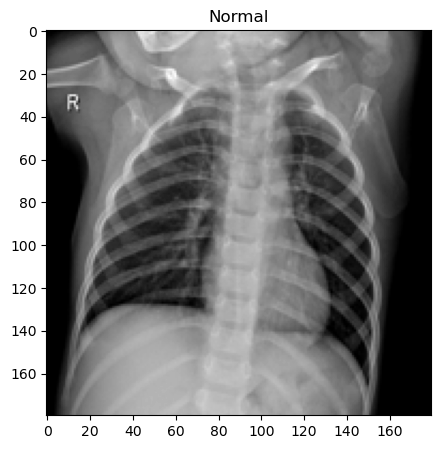

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(dataset[-1], cmap='gray')
plt.title('Normal')

In [8]:
dataset = np.array(dataset) / 255

In [9]:
dataset = dataset.reshape(-1, SIZE, SIZE, 1)
label = np.array(label)

In [10]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (180,180,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 180, 180, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 90, 90, 64)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 90, 90, 64)        2

In [11]:
print(len(dataset))
print(len(label))

5232
5232


In [ ]:
trained_model = model.fit(dataset, 
                         label, 
                         batch_size = 32,
                         verbose = 1, 
                         epochs = 12,
                         validation_split = 0.2,
                         shuffle = False
                     )

Epoch 1/12
 85/131 [==================>...........] - ETA: 42s - loss: 1.1659e-24 - accuracy: 1.0000

In [ ]:
dataset_test = []
label_test = []

In [ ]:
infected_images_test = os.listdir(images_directory + 'test/PNEUMONIA/')
for i, image_name in enumerate(infected_images_test):
     if (image_name.split('.')[1] == 'jpeg'):
        image = cv2.imread(images_directory + 'test/PNEUMONIA/' + image_name)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        dataset_test.append(np.array(image))
        label_test.append(0)

In [ ]:
normal_images_test = os.listdir(images_directory + 'test/NORMAL/')
for i, image_name in enumerate(normal_images_test):
     if (image_name.split('.')[1] == 'jpeg'):
        image = cv2.imread(images_directory + 'test/NORMAL/' + image_name)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        dataset_test.append(np.array(image))
        label_test.append(1)

In [ ]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(dataset_test), np.array(to_categorical(np.array(label_test))))[1]*100))